In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the single csv file to a variable named 'placement'
placement=pd.read_csv(r"C:\Users\Rishab Das\Downloads\Placement_Data_Full_Class.csv")

In [3]:
#copying for no data alteration
placement_copy=placement.copy()
placement_copy.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0

In [4]:
#checking null values
placement_copy.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
#filling null values
placement_copy['salary'].fillna(value=0, inplace=True)

In [6]:
#dropping unwanted features
placement_copy.drop(['sl_no'], axis = 1,inplace=True) 
placement_copy.head()

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0      M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1      M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2      M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3      M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4      M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   

  workex  etest_p specialisation  mba_p      status    salary  
0     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     No     66.0         Mkt&HR  59.43  Not Placed       0.0  
4     No     96.8        Mkt&Fin  55.50      Placed  425000.0

# Factors affecting Getting Placed

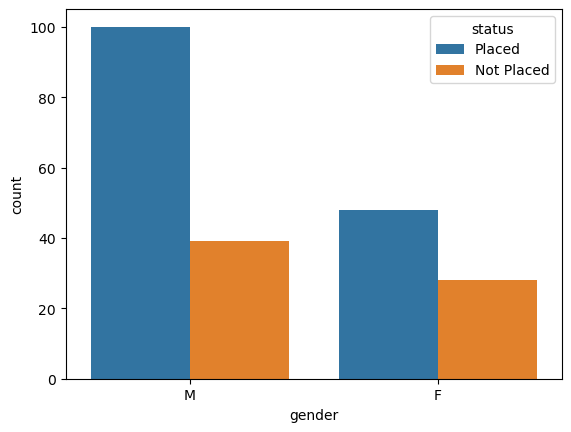

In [8]:
#does gender affect placement?

sns.countplot(x="gender", hue="status", data=placement_copy)
plt.show()

#more male students getting placed compared to female
#yes

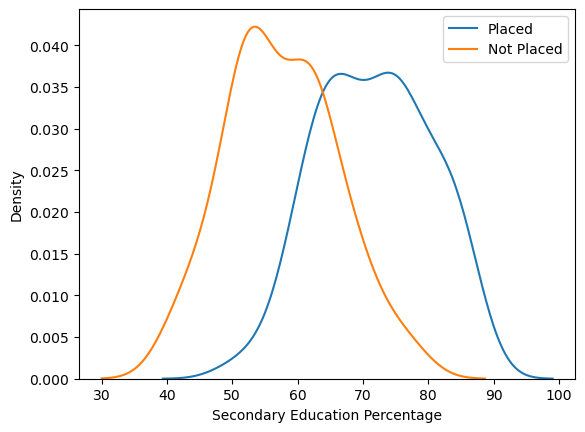

In [13]:
#does Secondary Education Percentage affect placemet?

sns.kdeplot(placement_copy.ssc_p[ placement_copy.status=="Placed"])
sns.kdeplot(placement_copy.ssc_p[ placement_copy.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

#ssc_p > 90% - more placed students
#ssc_p < 50% - max not placed students
#yes

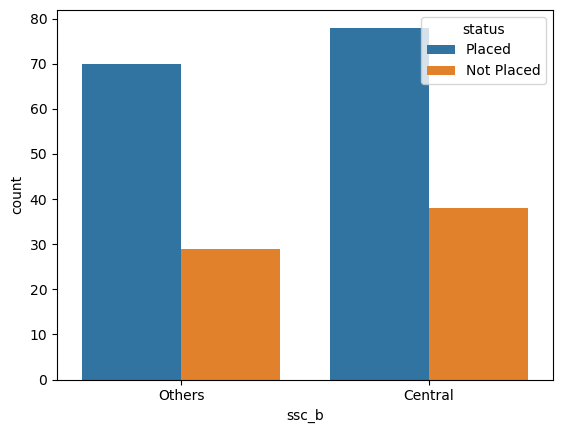

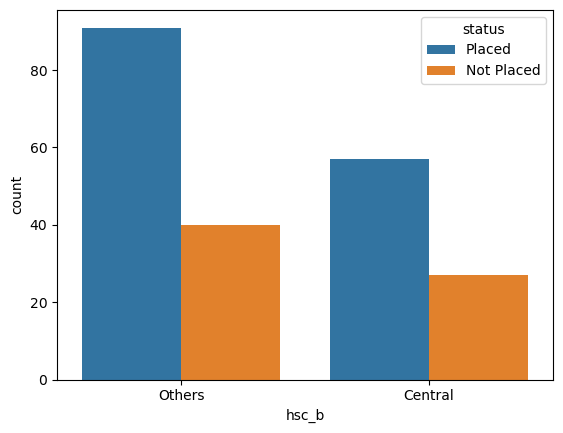

In [26]:
#does board of education affect placement?

sns.countplot(x="ssc_b", hue="status", data=placement_copy)
plt.show()
sns.countplot(x="hsc_b", hue="status", data=placement_copy)
plt.show()

#both data are irrelavant in comparison with very less diff
#NO

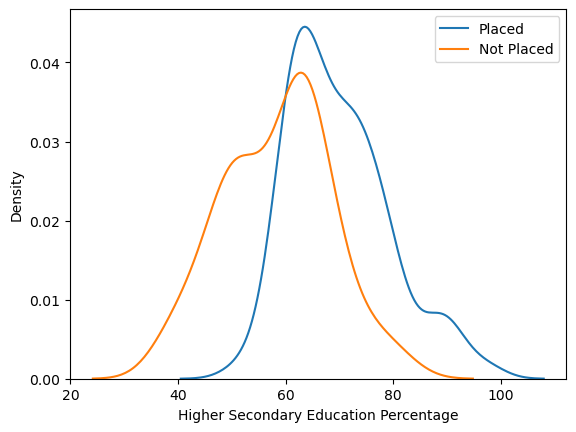

In [23]:
#does High School prercentage affect placement?

sns.kdeplot(placement_copy.hsc_p[ placement_copy.status=="Placed"])
sns.kdeplot(placement_copy.hsc_p[ placement_copy.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Higher Secondary Education Percentage")
plt.show()

#more placements for higher percentages
#overlap point - 60%
#Yes

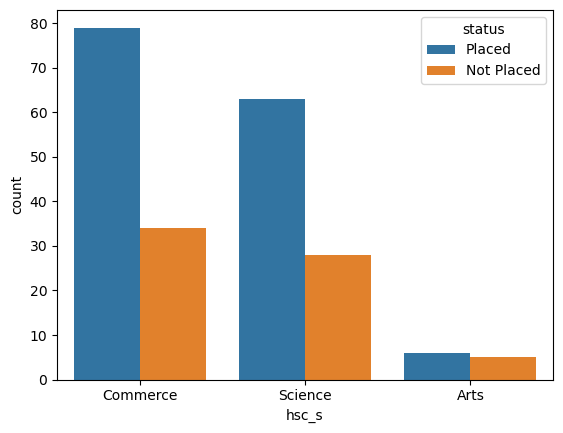

In [27]:
#does high school stream affect placement?

sns.countplot(x="hsc_s", hue="status", data=placement_copy)
plt.show()

#nothing vital
#50% from science and commerce each get placed
#NO

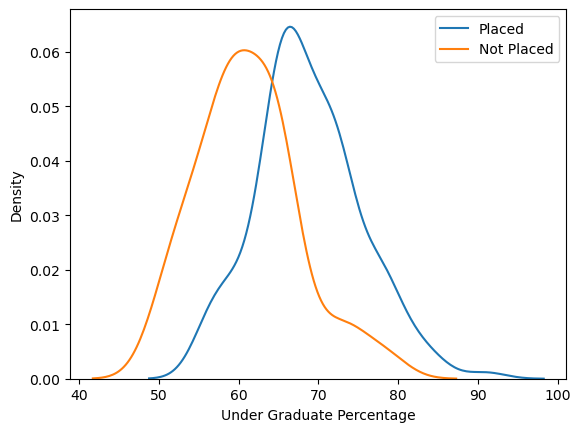

In [28]:
#does degree percentage affect placement?

sns.kdeplot(placement_copy.degree_p[ placement_copy.status=="Placed"])
sns.kdeplot(placement_copy.degree_p[ placement_copy.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Under Graduate Percentage")
plt.show()

#overlap - 65% min
#yes

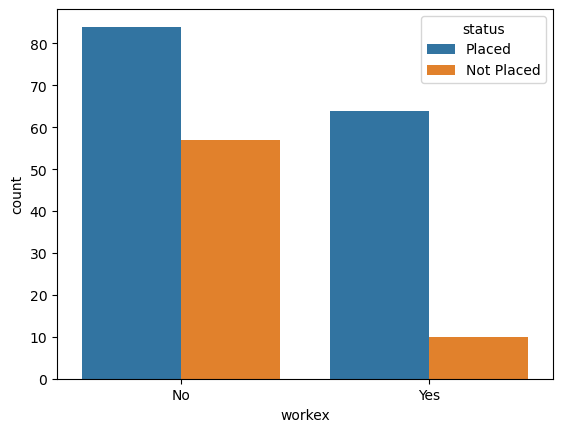

In [35]:
#workex affect placement?

sns.countplot(x="workex", hue="status", data=placement_copy)
plt.show()
#few students with wokrex +ve are not placed. diff is huge
#yes

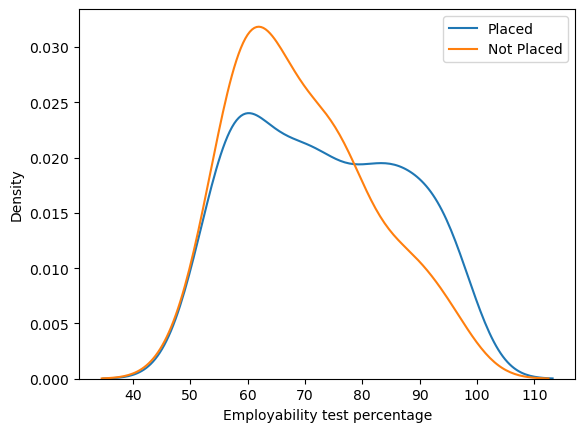

In [36]:
#does employability percentage affect placement?

sns.kdeplot(placement_copy.etest_p[ placement_copy.status=="Placed"])
sns.kdeplot(placement_copy.etest_p[ placement_copy.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Employability test percentage")
plt.show()

#low perc - more not placed
#yes

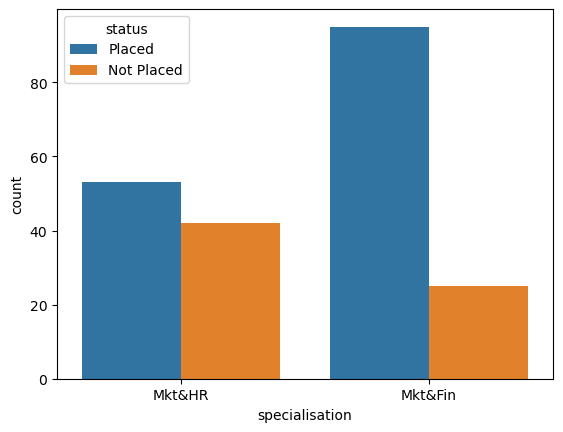

In [38]:
#does specialisation affect placement?
sns.countplot(x="specialisation", hue="status", data=placement_copy)
plt.show()

#more std of mkt&fin get placed
#yes

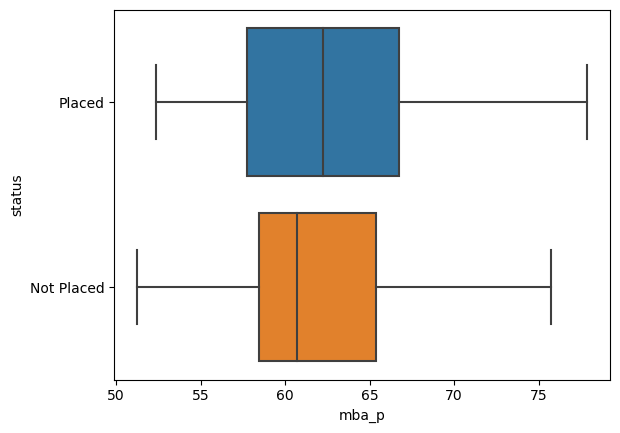

In [40]:
#does MBA percentage affect placement?
sns.boxplot(x="mba_p", y="status", data=placement_copy)
plt.show()

#NO

# Factors affecting Salary

In [44]:
#does gender affect salary?
import plotly_express as px
px.violin(placement_copy,y="salary",x="specialisation",color="gender",box=True,points="all")

#Both specialisations have higher salaries to males
#yes

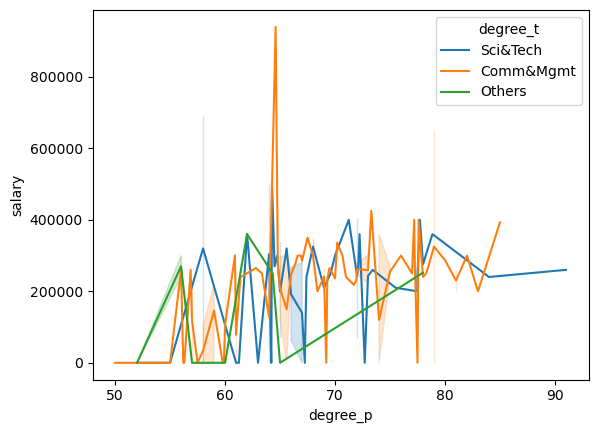

In [34]:
sns.lineplot(x="degree_p", y="salary", hue="degree_t", data=placement_copy)
plt.show()
#does not affect salary
# 65percentage got highest salary

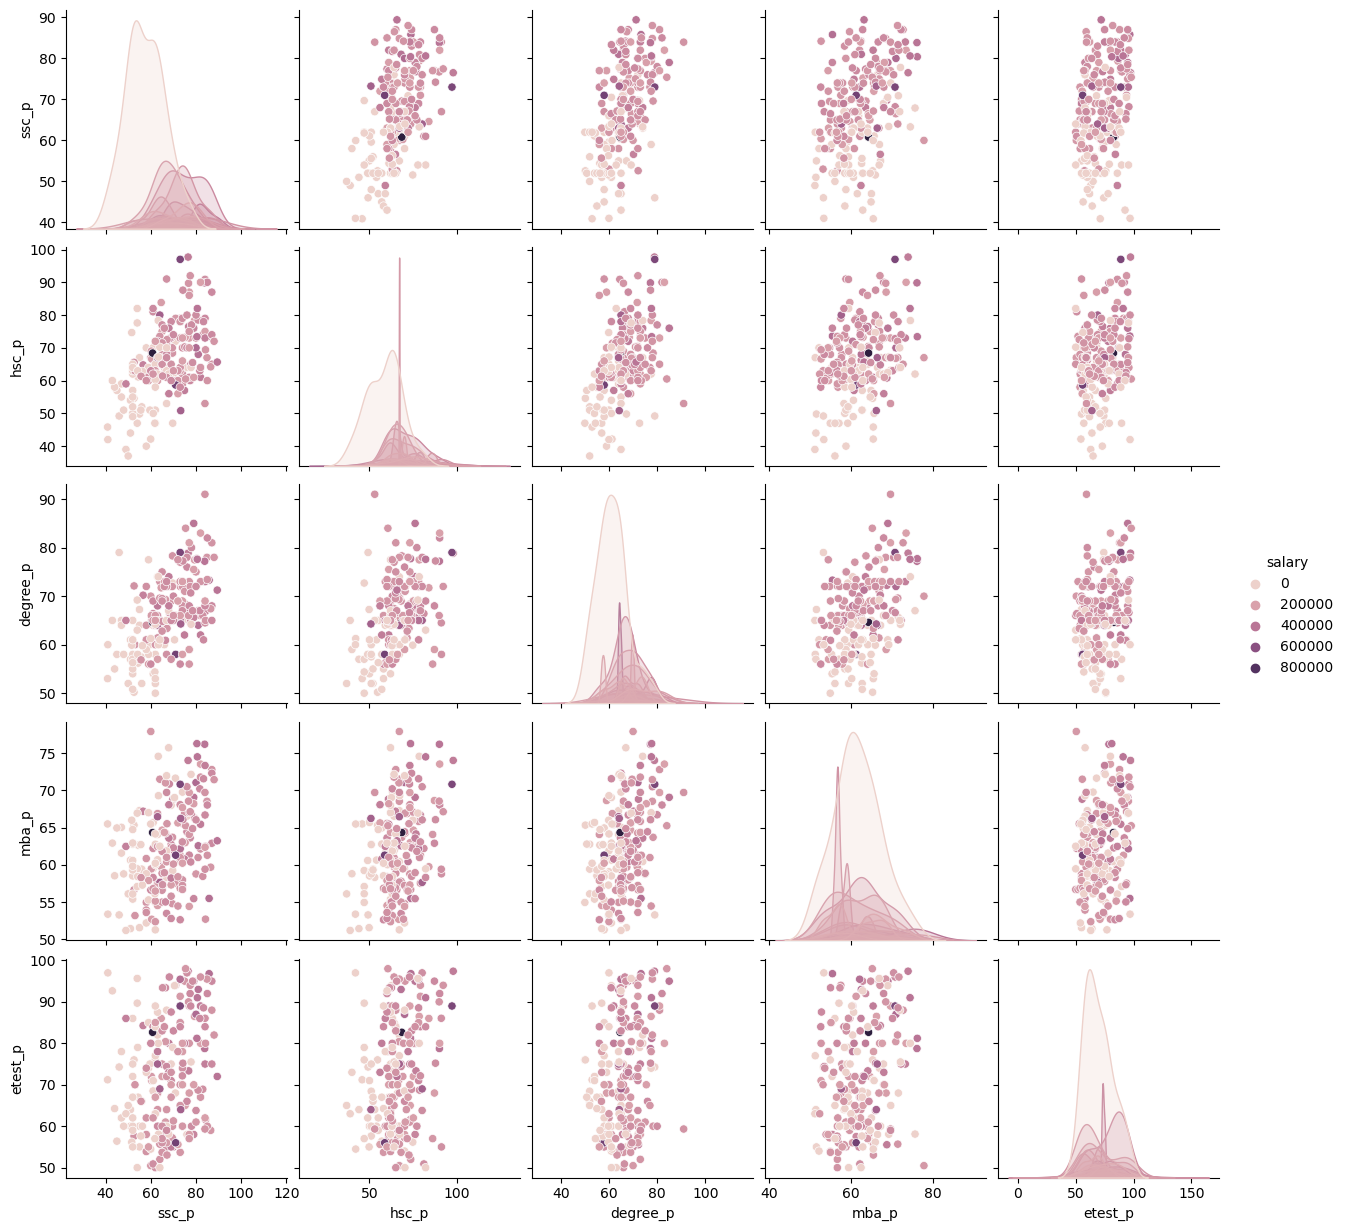

In [48]:
#summarizing all salary plots at once
sns.pairplot(placement_copy,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="salary")

#mean density of high salary at medians of every percentage status